In [2]:
!pip install gensim

    100% |████████████████████████████████| 23.6MB 22kB/s  eta 0:00:01
    100% |████████████████████████████████| 1.4MB 410kB/s eta 0:00:01
    100% |████████████████████████████████| 133kB 4.0MB/s eta 0:00:01
    100% |████████████████████████████████| 5.1MB 110kB/s eta 0:00:01
    100% |████████████████████████████████| 61kB 4.4MB/s eta 0:00:01
    100% |████████████████████████████████| 552kB 1.0MB/s eta 0:00:01
  Running setup.py bdist_wheel for smart-open ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/23/00/44/e5b939f7a80c04e32297dbd6d96fa3065af89ecf57e2b5f89f
  Running setup.py bdist_wheel for bz2file ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/81/75/d6/e1317bf09bf1af5a30befc2a007869fa6e1f516b8f7c591cb9
Successfully built smart-open bz2file
You are using pip version 9.0.3, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import gensim
import re
from gensim.models import word2vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

inquiry = pd.read_csv('/home/jovyan/work/Charter-school-identities/dicts/inquiry.txt', names = ["words"])
discipline = pd.read_csv('/home/jovyan/work/Charter-school-identities/dicts/discipline.txt', names = ["words"])

ModuleNotFoundError: No module named 'gensim'

In [4]:
#loading gensim model
wem_newpath = "../Charter-school-identities/data/wem_model_train250_nostem_unlapped_300d.txt"
model = gensim.models.KeyedVectors.load_word2vec_format(wem_newpath)

In [5]:
#saving word vector values to eahc of the word
#for inquiry
inquiry_dict = {}
for word in inquiry["words"]:
    try:
        inquiry_dict[word] = model[word]
    except:
        pass
inquiry_df = pd.DataFrame(inquiry_dict)
#transposing to get the right structure of the dataframe
inquiry_df = inquiry_df.transpose()
inquiry_df

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
child-centered,-0.223536,-0.280179,-0.522537,-0.080417,0.259663,0.059971,-0.130998,0.209995,-0.165278,-0.340998,...,0.076080,-0.150371,0.225559,0.301420,0.063409,0.002296,-0.015346,0.104561,-0.125118,0.436687
constructivism,-0.370440,-0.121814,-0.391615,0.294201,0.499358,-0.036439,-0.072624,0.174303,0.059905,0.200193,...,0.216051,-0.347554,0.137572,-0.031884,-0.302067,0.173824,-0.220757,0.132129,-0.208248,0.435613
constructivist,-0.125934,-0.274248,-0.383228,0.300299,0.059413,-0.262667,0.033480,0.355358,0.061211,0.050555,...,-0.065541,-0.059016,0.180831,0.297140,0.124830,0.060155,0.238511,-0.073184,-0.164461,0.376037
discovery-based,-0.177287,0.017883,-0.329222,0.527086,0.271766,-0.075400,0.046229,0.004085,-0.346416,0.158446,...,0.134296,-0.157667,0.088938,0.160586,0.097523,0.004950,0.204685,0.053208,0.023183,0.431649
experiential,-0.216778,-0.113035,-0.364965,0.403791,0.428214,-0.068476,0.117416,0.367349,-0.456666,0.195170,...,-0.219300,-0.033426,0.348787,0.377356,0.535646,0.286097,-0.040895,0.232187,0.097795,0.087463
experiential_approach,-0.209821,-0.084027,-0.488750,0.343187,0.263592,-0.040910,-0.003493,0.058746,-0.209947,0.218233,...,-0.001593,0.117917,0.147664,0.343367,0.057345,-0.101222,-0.008007,0.232976,-0.008523,0.242115
experientially,-0.286302,-0.005216,-0.250082,0.309847,0.202927,-0.122019,-0.088174,0.179324,-0.235942,0.124482,...,0.150354,0.033312,0.128087,0.035366,-0.007831,-0.054010,-0.167701,0.109029,0.144179,0.245457
exploration_and_experimentation,-0.079227,-0.042926,-0.193239,0.238283,0.197528,-0.063725,-0.047722,0.105371,-0.072445,0.275851,...,0.060670,-0.076957,0.053528,-0.082333,-0.003719,-0.054365,-0.225792,0.083085,0.141503,0.188962
hand-on,-0.533902,-0.045876,-0.328929,0.452986,0.267223,-0.004125,-0.059959,0.328505,-0.470608,0.243717,...,0.133391,-0.073767,0.329819,-0.074540,0.085716,0.000331,-0.208117,0.176801,0.372517,0.362973
hands-on,-0.446947,0.125502,-0.178787,0.805150,0.034277,0.176310,0.075295,0.249393,-0.874661,0.368544,...,0.038274,-0.156614,-0.046744,0.541522,0.164126,0.089342,-0.139488,0.246870,0.064627,0.138243


In [6]:
#for discipline
discipline_dict = {}
for word in discipline["words"]:
    try:
        discipline_dict[word] = model[word]
    except:
        pass
discipline_df = pd.DataFrame(discipline_dict)
#transposing to get the right structure of the dataframe
discipline_df = discipline_df.transpose()
discipline_df

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
absenteeism,0.010502,0.040957,-0.086818,0.485527,-0.207656,0.383854,-4.266053e-01,0.271330,0.084931,0.059831,...,0.023642,0.678707,-0.316479,0.109690,0.237365,0.442799,0.166709,0.272032,-0.320703,0.052399
authority,-0.011955,0.182964,-0.223594,-0.131090,0.447451,-0.155394,6.079819e-02,-0.222783,0.085154,0.386979,...,0.206970,-0.041891,-0.573840,0.473945,0.000051,-0.311025,-0.116207,0.172977,-0.230257,0.055051
behavioral_expectations,0.157860,0.072862,-0.304105,-0.264066,0.271132,0.484545,-7.117357e-01,-0.022437,0.000419,-0.342726,...,0.064211,0.010204,0.285722,0.471233,0.002950,0.760915,0.560328,0.247220,-0.461230,0.036900
crime,0.137011,-0.050526,-0.210119,0.071664,0.152821,-0.076346,4.757771e-02,0.028689,-0.104739,0.450580,...,-0.374410,-0.478106,-0.780088,0.462196,0.323464,-0.066423,-0.160871,-0.175447,-0.764432,0.338723
criminal,-0.157664,0.255354,-0.422614,0.564086,-0.208480,-0.603949,-1.590988e-01,0.082046,0.000603,0.621613,...,-0.059967,-0.094949,-0.263174,0.108358,-0.074009,-0.370365,-0.099090,0.200054,-0.323902,0.385747
deter,-0.094640,0.012562,-0.250023,-0.070070,0.101481,-0.060158,-3.088175e-01,-0.002195,-0.132421,0.281476,...,-0.204091,0.071066,-0.205270,-0.027318,-0.164253,0.002307,0.201648,-0.166310,-0.066175,0.457777
deterrence,0.000546,-0.000016,-0.000773,0.001268,0.001270,-0.000063,-1.966663e-07,0.000501,-0.000305,-0.001398,...,0.001525,-0.000411,-0.001275,-0.000466,-0.000788,0.000362,-0.000880,0.000834,0.000324,0.000578
disciplinary,0.084876,0.008891,0.003930,0.286499,0.596174,-0.357222,-5.315543e-01,0.261582,0.089593,-0.129181,...,-0.185367,0.102966,0.451592,0.391479,0.051713,-0.194058,0.247701,-0.014793,-0.088761,0.168270
discipline,-0.525773,-0.010902,-0.498947,0.405120,-0.179607,-0.021946,-4.955370e-01,-0.029583,0.150491,0.192474,...,0.024711,0.217151,-0.111290,0.444188,0.013686,-0.020267,0.253278,-0.301642,-0.557863,0.182920
disobedience,-0.063417,-0.074398,-0.045514,0.060650,-0.047621,-0.098331,-1.085910e-01,0.040564,0.032963,0.276565,...,0.069829,-0.080415,-0.318959,0.055634,0.083423,0.011491,-0.021378,0.117784,-0.115334,0.142472


In [1]:
def display_closestwords(model, word, plotnumber):
    '''Use tSNE to display a spatial map (i.e., scatterplot) of words vectors close to given word in Word2Vec model.
    Projects each word to a 2D space (a reduction from model size) and plots the position of each word with a label.
    Based on this blog: 
    https://medium.com/@aneesha/using-tsne-to-plot-a-subset-of-similar-words-from-word2vec-bb8eeaea6229)
    
    Args:
        Word2Vec model
        Input word
        Number of words to plot
    Returns:
        Visualization of relationships between given word and its closest word vectors
    '''
    
    arr = np.empty((0,300), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word, plotnumber)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

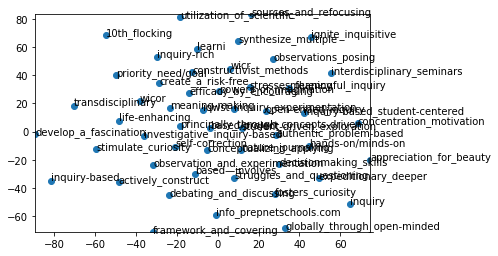

In [8]:
display_closestwords_tsnescatterplot(model, "inquiry")

## T-SNE plot for inquiry and discipline topics, for all words

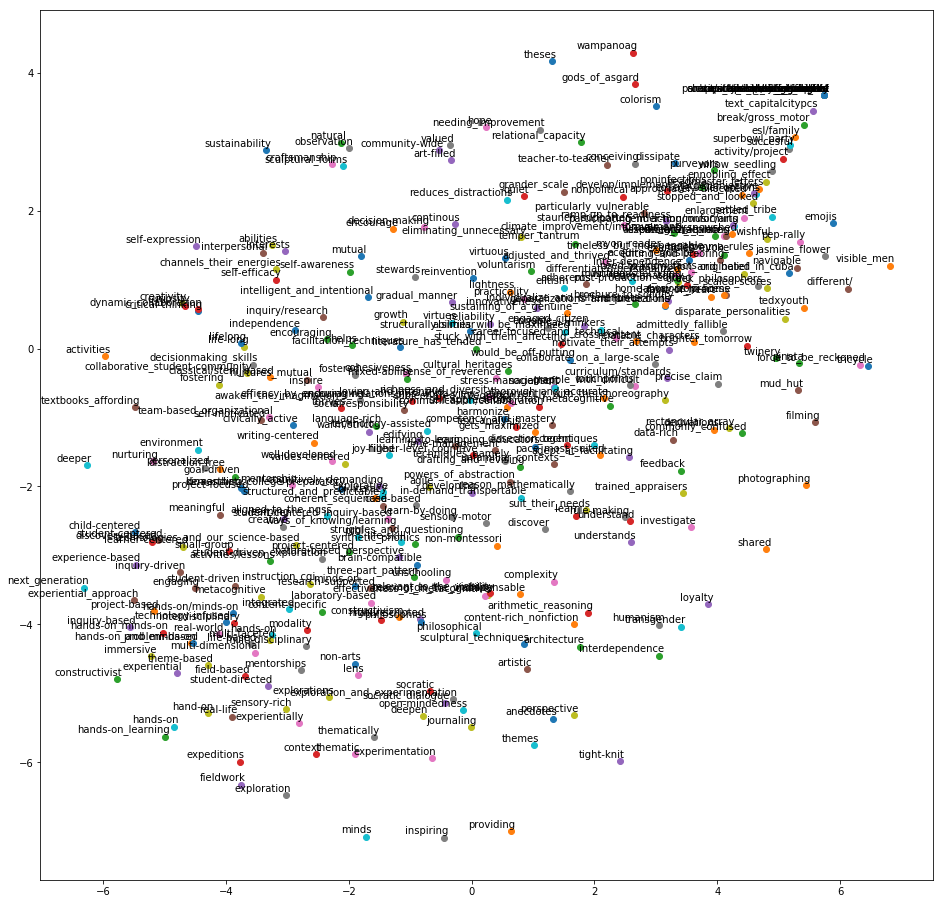

In [9]:
#inquiry
labels = []
tokens = []

for word in inquiry["words"]:
    try:
        tokens.append(model[word])
        labels.append(word)
    except:
        pass   
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(tokens)

x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])
        
plt.figure(figsize=(16, 16)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
                xy=(x[i], y[i]),
                xytext=(5, 2),
                textcoords='offset points',
                ha='right',
                va='bottom')
plt.show()

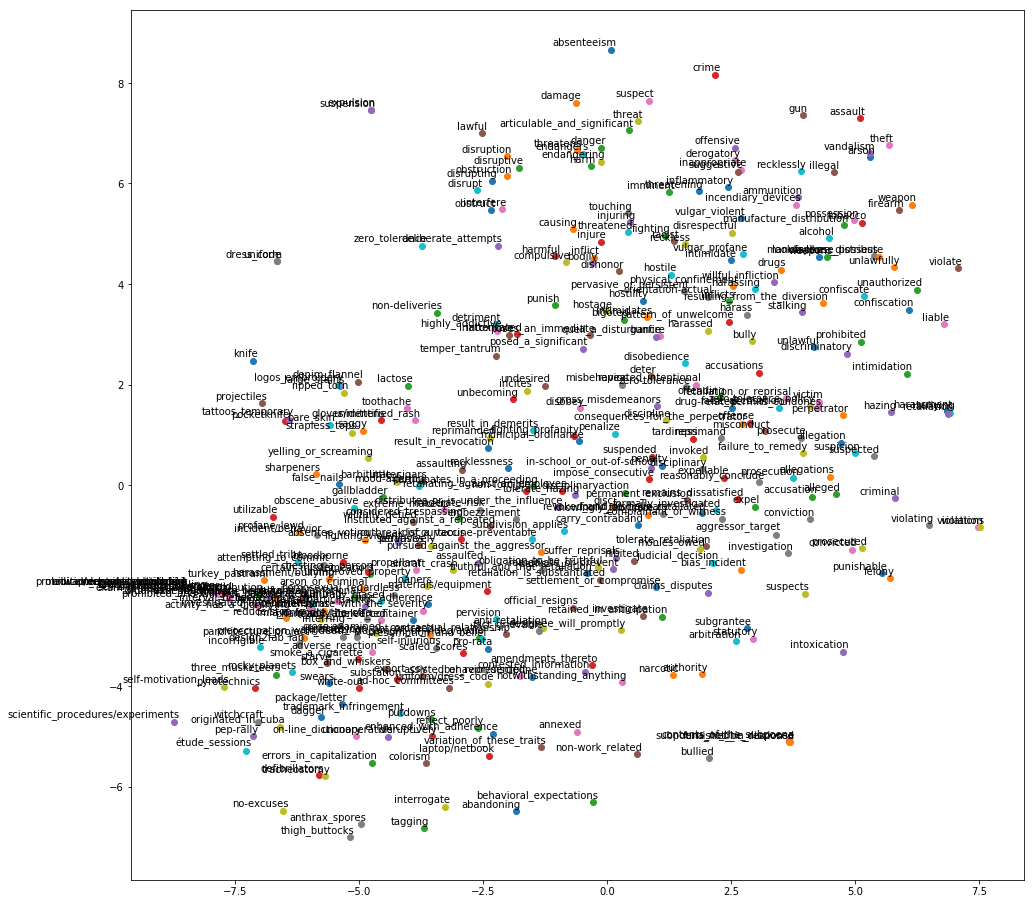

In [10]:
#discipline
labels = []
tokens = []

for word in discipline["words"]:
    try:
        tokens.append(model[word])
        labels.append(word)
    except:
        pass   
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(tokens)

x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])
        
plt.figure(figsize=(16, 16)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
                xy=(x[i], y[i]),
                xytext=(5, 2),
                textcoords='offset points',
                ha='right',
                va='bottom')
plt.show()

## T-SNE plot for selected 50 words

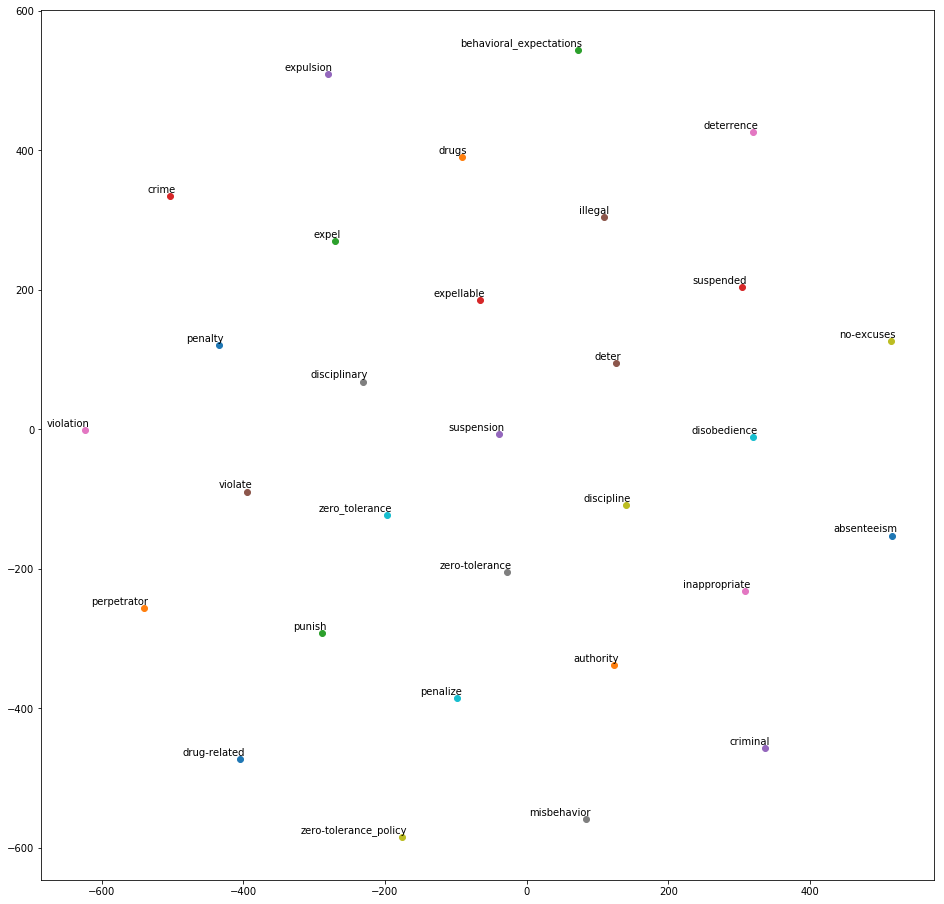

In [11]:
#inquiry
labels = []
tokens = []

for word in discipline["words"][:30]:
    try:
        tokens.append(model[word])
        labels.append(word)
    except:
        pass   
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(tokens)

x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])
        
plt.figure(figsize=(16, 16)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i],)
    plt.annotate(labels[i],
                xy=(x[i], y[i]),
                xytext=(5, 2),
                textcoords='offset points',
                ha='right',
                va='bottom')
plt.show()

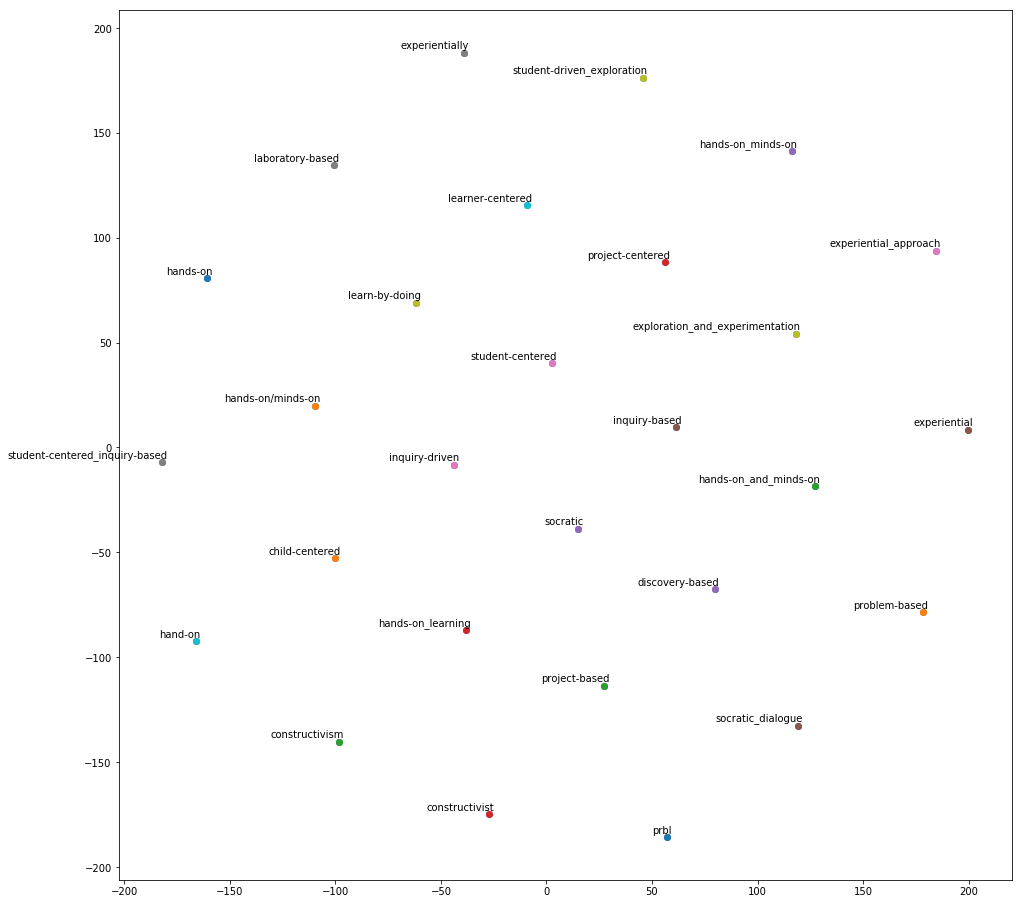

In [32]:
#inquiry
labels = []
tokens = []

for word in inquiry["words"][:30]:
    try:
        tokens.append(model[word])
        labels.append(word)
    except:
        pass   
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(tokens)

x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])
        
plt.figure(figsize=(16, 16)) 
plt.scatter(x,y)
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
                xy=(x[i], y[i]),
                xytext=(5, 2),
                textcoords='offset points',
                ha='right',
                va='bottom')
plt.show()

## Core terms, discipline and inquiry-based put together

In [13]:
inquiry_core = inquiry["words"][:30].copy()
discipline_core = discipline["words"][:30].copy()
inquiry_core = list(inquiry_core)
discipline_core = list(discipline_core)
#inquiry are first 30 and discipline are last 30, note for coloring
core_words = inquiry_core + discipline_core

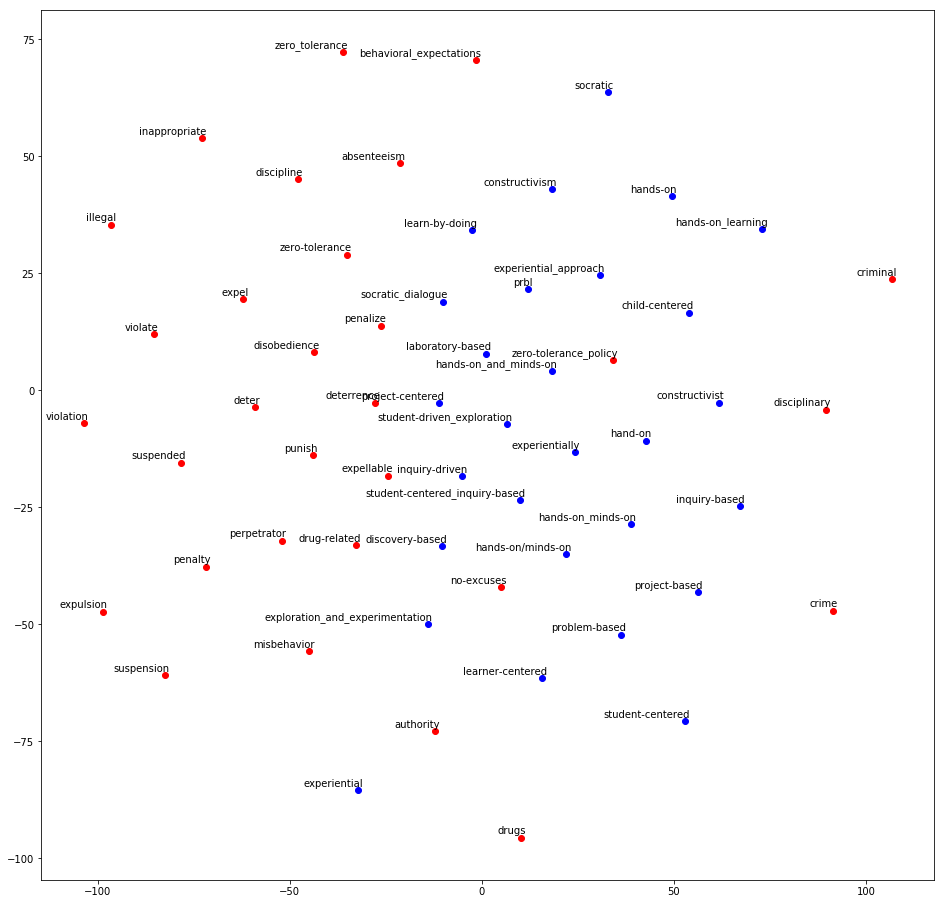

In [31]:
labels = []
tokens = []

for word in core_words:
    try:
        tokens.append(model[word])
        labels.append(word)
    except:
        pass   
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(tokens)

x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])
#lst_colors = np.repeat(np.array(["Inquiry","Discipline"]), [28,30], axis=0) #categorizing
plt.figure(figsize=(16, 16)) 
#manually dividing up and plotting two separate times, for inquiry and discipline
#if you recreate the dictionaries and it becomes a full 30:30 dict, readjust those numbers below
plt.scatter(x[:28],y[:28], c="blue")
plt.scatter(x[28:],y[28:], c="red")

for i in range(len(x)):
    plt.annotate(labels[i],
                xy=(x[i], y[i]),
                xytext=(5, 2),
                textcoords='offset points',
                ha='right',
                va='bottom')
plt.show()